## Bridging Biological and Artificial Intelligence

This notebook explores how biological neurons (Hodgkin-Huxley model) relate to artificial neurons in deep learning. Understanding these parallels lies at the heart of **NeuroAI**, using neuroscience to inspire AI, and AI to understand the brain.

**Learning Goals**
- Understand differences between biological and artificial neurons
- Explore insights from neuroscience that inform AI
- Relate the Hodgkin-Huxley model to modern architectures
- Connect parameter inference in biology and AI

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append("pyHH/src")
from pyhh import HHModel, Simulation

%matplotlib inline

### Simulating a Biological Neuron

Generate a typical action potential using the Hodgkin-Huxley model (biologically grounded description of a neuron’s response to input current) using `pyhh`.

In [2]:
def simulate_hh_spike(V_rest=50.0, stim_amplitude=5.0):
    """Simulate HH model and return membrane potential trace."""
    model = HHModel()
    model.V_rest = V_rest
    
    stim = np.zeros(20000)
    stim[7000:13000] = stim_amplitude  # 60 ms pulse
    
    sim = Simulation(model)
    sim.Run(stimulusWaveform=stim, stepSizeMs=0.01)
    return sim.Vm

hh_voltage = simulate_hh_spike()
time_hh = np.arange(len(hh_voltage)) * 0.01

print(f"Simulated {len(hh_voltage)} points ({time_hh[-1]:.1f} ms)")
print(f"Peak voltage: {np.max(hh_voltage):.2f} mV")
print(f"Resting voltage: {hh_voltage[0]:.2f} mV")

simulating 20000 time points...
simulation complete
Simulated 20000 points (200.0 ms)
Peak voltage: 104.32 mV
Resting voltage: -0.01 mV


### Artificial Neuron Activation Functions

Artificial neurons use simple nonlinear functions (ReLU, sigmoid, tanh) to introduce complexity. Let’s define and visualize them.

In [3]:
x = np.linspace(-80, 40, 1000)

def relu(x): return np.maximum(0, x + 65)
def sigmoid(x): return 100 / (1 + np.exp(-x/10))
def tanh(x): return 50 * np.tanh(x/20) + 50
def leaky_relu(x, alpha=0.01): return np.where(x > -65, x + 65, alpha * (x + 65))

relu_vals = relu(x)
sigmoid_vals = sigmoid(x)
tanh_vals = tanh(x)
leaky_relu_vals = leaky_relu(x)

### Visual Comparison

Compare biological and artificial neuron responses.

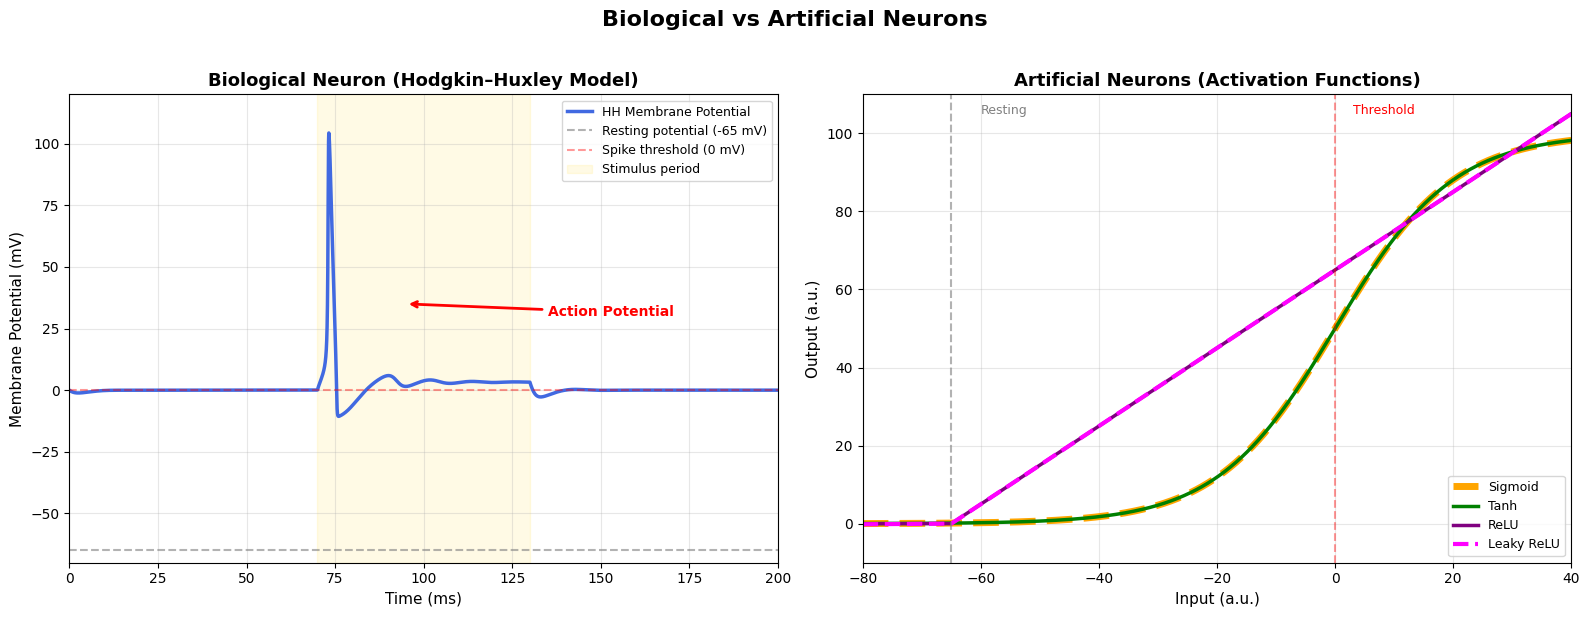

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("Biological vs Artificial Neurons", fontsize=16, fontweight='bold', y=1.02)

# Left: Biological Neuron (Hodgkin–Huxley)
ax1 = axes[0]
ax1.plot(time_hh, hh_voltage, color='royalblue', linewidth=2.5, label='HH Membrane Potential')
ax1.axhline(-65, color='gray', linestyle='--', alpha=0.6, label='Resting potential (-65 mV)')
ax1.axhline(0, color='red', linestyle='--', alpha=0.4, label='Spike threshold (0 mV)')
ax1.axvspan(70, 130, alpha=0.1, color='gold', label='Stimulus period')

ax1.set_title("Biological Neuron (Hodgkin–Huxley Model)", fontsize=13, fontweight='bold')
ax1.set_xlabel("Time (ms)", fontsize=11)
ax1.set_ylabel("Membrane Potential (mV)", fontsize=11)
ax1.set_xlim(0, 200)
ax1.set_ylim(-70, 120)
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=9, loc='upper right')

ax1.annotate('Action Potential', xy=(95, 35), xytext=(135, 30),
             arrowprops=dict(arrowstyle='->', lw=2, color='red'),
             fontsize=10, color='red', fontweight='bold')


# Right: Artificial Neuron Activation Functions
ax2 = axes[1]
ax2.plot(x, 100 * (1 / (1 + np.exp(-x/10))), '--', color='orange', linewidth=5.0, label='Sigmoid')
ax2.plot(x, 50 * np.tanh(x/20) + 50, color='green', linewidth=2.5, label='Tanh')
ax2.plot(x, np.maximum(0, x + 65), color='purple', linewidth=2.5, label='ReLU')
ax2.plot(x, np.where(x > -65, x + 65, 0.01 * (x + 65)), '--', color='magenta', linewidth=3.0, label='Leaky ReLU')

# Add reference lines
ax2.axvline(-65, color='gray', linestyle='--', alpha=0.6)
ax2.axvline(0, color='red', linestyle='--', alpha=0.4)
ax2.text(-60, 105, 'Resting', color='gray', fontsize=9)
ax2.text(3, 105, 'Threshold', color='red', fontsize=9)

ax2.set_title("Artificial Neurons (Activation Functions)", fontsize=13, fontweight='bold')
ax2.set_xlabel("Input (a.u.)", fontsize=11)
ax2.set_ylabel("Output (a.u.)", fontsize=11)
ax2.set_xlim(-80, 40)
ax2.set_ylim(-10, 110)
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=9, loc='lower right')

plt.tight_layout()
plt.show()



### Quantitative Comparison

Compare biological (HH) and artificial neurons on key computational properties.

In [5]:
print("="*70)
print("QUANTITATIVE COMPARISON: BIOLOGICAL vs ARTIFICIAL")
print("="*70)

# Spike duration
spike_indices = np.where(hh_voltage > 0)[0]
if len(spike_indices) > 0:
    spike_duration = (spike_indices[-1] - spike_indices[0]) * 0.01
    print(f"Spike duration: {spike_duration:.2f} ms")

# Spike count
spike_count = np.sum((hh_voltage[:-1] < 0) & (hh_voltage[1:] > 0))
print(f"Spike count: {spike_count}")
print(f"Peak voltage: {np.max(hh_voltage):.2f} mV")
print(f"Range: {np.max(hh_voltage)-np.min(hh_voltage):.1f} mV")

print("\nArtificial neurons:")
print(" - Instantaneous, continuous outputs")
print(" - ReLU: piecewise linear; Sigmoid/Tanh: smooth & bounded")

QUANTITATIVE COMPARISON: BIOLOGICAL vs ARTIFICIAL
Spike duration: 138.76 ms
Spike count: 5
Peak voltage: 104.32 mV
Range: 115.0 mV

Artificial neurons:
 - Instantaneous, continuous outputs
 - ReLU: piecewise linear; Sigmoid/Tanh: smooth & bounded


###  **Insights: Linking Biological and Artificial Neurons**

1. **Signal Generation vs Transformation**

   * *Biological neurons* are **dynamic systems**: they integrate inputs over time, trigger discrete spikes once a voltage threshold is exceeded, and then reset through ion channel kinetics.
   * *Artificial neurons* are **static transformations**: they map inputs to outputs instantaneously via a mathematical activation function.
    → Biological neurons encode information in *spike timing* and *frequency*, whereas artificial ones rely on *continuous activations*.

2. **Nonlinearity as a Shared Core Principle**

   * Both systems introduce **nonlinearity** to break linear separability limits.
   * The **Hodgkin–Huxley model’s voltage-gated ion channels** act like biological analogues of nonlinear activations, turning a small voltage change into an all-or-nothing response.
   * In deep learning, this nonlinearity allows networks to form complex hierarchical representations.

3. **Thresholding and Excitability**

   * The **spike threshold (~0 mV)** in biological neurons mirrors the **activation threshold** in ReLU-like units.
   * Both determine whether a signal “passes through.” However, neurons exhibit **graded responses** before spiking and **refractory periods** after, phenomena missing from artificial models.

4. **Temporal Dynamics and Memory**

   * Biological neurons carry **temporal memory** due to membrane capacitance and ion kinetics.
   * Artificial neurons in standard feed-forward networks lack time, they compute purely on current input.
   * Recurrent and spiking neural networks (SNNs) attempt to re-introduce these temporal effects, bridging biology and AI.

5. **Energy and Efficiency**

   * Spiking systems are **event-driven**, activating only when necessary, energy-efficient and sparse.
   * Deep nets continuously compute dense matrix operations; efficiency comes from hardware, not biology.
   * Neuromorphic chips (e.g., Intel Loihi, IBM TrueNorth) mimic this sparse, event-based computation.

6. **Learning Mechanisms**

   * Biological learning relies on **synaptic plasticity** (e.g., Hebbian learning, STDP).
   * Artificial models rely on **gradient-based optimization** (backpropagation).
   * Both adjust connection weights, but biological mechanisms are **local and time-dependent**, while backprop is **global and instantaneous**.

7. **Interpreting the Visual Comparison**

   * The **HH trace** shows discrete spikes — a *binary communication mechanism*.
   * The **activation curves** show continuous mappings — *differentiable approximations* of neuronal firing rates.
   * The sigmoid and tanh mimic soft firing rates; ReLU mimics sparse activation akin to neurons that are “off” unless sufficiently stimulated.






## Summary

- **Biological neurons** are dynamic, sparse, and energy-efficient  
- **Artificial neurons** are simple, fast, and parallel  
- **NeuroAI** combines both approaches for interpretable, efficient intelligence  
- **Your parameter inference project** connects Bayesian neuroscience with machine learning